In [50]:
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns

In [51]:
ea_data = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\filtered_ea_clean.csv")
# dfts = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\Descriptors\dft_descriptors_cclib_final_2.csv")
# dfts = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\fg\fluorinated_data.csv")
ea_data.dropna(inplace=True)
ea_data.rename(columns={'solvent ID': 'solvent_ID', 'EA_0-1': 'EA_values'}, inplace=True)
# dfts.rename(columns={'solvent ID': 'solvent_ID', 'EA_0-1': 'EA_values'}, inplace=True)
# dfts.rename(columns={'solvent_id': 'solvent_ID'}, inplace=True)
# dfts.rename(columns={'solvent ID': 'solvent_ID'}, inplace=True)

In [52]:
ea_data.head()
# dfts.head()

,solvent_ID,smiles,EA_values
0,zinc_1345620175,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O,-5.118749
1,zinc_674912368,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1,-4.129380
2,zinc_644654185,CC[C@@H](O)CNCC(C)(F)F,-4.700916
3,zinc_132906027,CC[C@@H](NCCOCC(C)C)C1CC1,-4.305889
4,zinc_156549661,C[C@H](O)CN1CCC[C@H]1C,-5.431978


In [ ]:
# df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_merged.csv")
# df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_filtered_ea.csv")
df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_filtered_ea_rd_dft.csv") #Already has EA_Values, no need to merge


In [54]:
df

,FractionCSP3,MolMR,HallKierAlpha,lumo_eV,SlogP_VSA6,SMR_VSA9,BCUT2D_MRHI,SMR_VSA7,Chi4n,qed,...,min_abs_partial_charge,fr_Ndealkylation2,fr_piperzine,fr_methoxy,fr_SH,PEOE_VSA12,NumValenceElectrons,EA_values,solvent_ID,smiles
0,1.0,51.4305,-0.15,-4.168789,0.0,0.0,4.834380,0.0,1.750296,0.706887,...,0.172385,0.0,0.0,0.0,0.0,0.0,78.0,-5.118749,zinc_1345620175,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O
1,1.0,53.7420,-0.08,1.917791,0.0,0.0,4.896489,0.0,2.977819,0.660738,...,0.000737,1.0,0.0,1.0,0.0,0.0,76.0,-4.129380,zinc_674912368,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1
2,1.0,39.7885,-0.22,-1.747485,0.0,0.0,4.640014,0.0,0.602609,0.639944,...,0.059057,0.0,0.0,0.0,0.0,0.0,68.0,-4.700916,zinc_644654185,CC[C@@H](O)CNCC(C)(F)F
3,1.0,60.4627,-0.08,2.125120,0.0,0.0,4.846649,0.0,1.778457,0.606243,...,0.011509,0.0,0.0,0.0,0.0,0.0,84.0,-4.305889,zinc_132906027,CC[C@@H](NCCOCC(C)C)C1CC1
4,1.0,41.9498,-0.08,0.436871,0.0,0.0,4.754257,0.0,1.603366,0.619226,...,0.051486,1.0,0.0,0.0,0.0,0.0,60.0,-5.431978,zinc_156549661,C[C@H](O)CN1CCC[C@H]1C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,1.0,40.4317,-0.04,5.138792,0.0,0.0,4.789018,0.0,1.203936,0.605099,...,0.007681,0.0,0.0,0.0,0.0,0.0,54.0,-4.366178,zinc_72209843,CCNC[C@H](C)C1CC1
2980,1.0,44.5567,-0.22,4.576042,0.0,0.0,4.711497,0.0,1.032328,0.672445,...,0.003395,0.0,0.0,1.0,0.0,0.0,74.0,-4.120930,zinc_648619232,CC[C@@H](N[C@H](C)COC)C(F)F
2981,1.0,46.8370,-0.08,8.855900,0.0,0.0,4.392101,0.0,0.873700,0.506854,...,0.123164,0.0,0.0,0.0,0.0,0.0,68.0,-4.427810,zinc_28278463,CCOCCCCCOCC
2982,1.0,55.8937,-0.08,2.621228,0.0,0.0,4.747332,0.0,1.762316,0.684642,...,0.111070,0.0,0.0,1.0,0.0,0.0,78.0,-5.420513,zinc_223954234,CO[C@@H](C)CN[C@@H](C)CC1CCC1


In [55]:
# df.drop(columns=["EA_values"], axis=1, inplace=True)

In [56]:
# df = df.merge(dfts[['solvent_ID', "smiles", "EA_values"]], on=['solvent_ID', "smiles"], how="right")

In [57]:
# df.head()

In [58]:
df.describe()

,FractionCSP3,MolMR,HallKierAlpha,lumo_eV,SlogP_VSA6,SMR_VSA9,BCUT2D_MRHI,SMR_VSA7,Chi4n,qed,...,PEOE_VSA10,Chi0v,min_abs_partial_charge,fr_Ndealkylation2,fr_piperzine,fr_methoxy,fr_SH,PEOE_VSA12,NumValenceElectrons,EA_values
count,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,...,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000
mean,0.952437,44.571986,-0.197221,-1.255360,1.677464,0.272004,4.837742,1.675791,1.210883,0.586863,...,0.933861,7.377394,0.062827,0.200067,0.001005,0.365282,0.002681,0.226386,65.369303,-4.816064
std,0.092445,9.624560,0.190224,5.288044,4.527096,1.474107,0.412880,4.526793,0.527733,0.076244,...,2.554478,1.558240,0.051428,0.400117,0.031697,0.578368,0.051717,1.185507,12.716895,0.708541
min,0.333333,14.613000,-1.300000,-44.146218,0.000000,0.000000,4.147815,0.000000,0.000000,0.293598,...,0.000000,2.639919,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,-6.336051
25%,1.000000,37.711225,-0.290000,-3.583826,0.000000,0.000000,4.663562,0.000000,0.828501,0.545397,...,0.000000,6.381213,0.020604,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,-5.458039
50%,1.000000,46.419650,-0.120000,-0.499810,0.000000,0.000000,4.760959,0.000000,1.190445,0.596082,...,0.000000,7.613762,0.049420,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,-4.794992
75%,1.000000,51.454500,-0.080000,2.067734,0.000000,0.000000,4.850353,0.000000,1.576844,0.640038,...,0.000000,8.536039,0.092606,0.000000,0.000000,1.000000,0.000000,0.000000,76.000000,-4.249113
max,1.000000,64.183000,0.500000,11.358655,25.682032,12.343784,8.557959,25.682032,3.014056,0.751421,...,19.820646,10.748179,0.231562,1.000000,1.000000,4.000000,1.000000,12.332624,84.000000,-2.431185


In [59]:
# df = df.merge(ea_data, on=['solvent_ID'], how="right")
# df = df[(df["EA_values"] < -3) & (df["EA_values"] > -6)]

In [ ]:
# df.drop("FractionCSP3", axis=1, inplace=True)

In [62]:
df.head()

,MolMR,HallKierAlpha,lumo_eV,SlogP_VSA6,SMR_VSA9,BCUT2D_MRHI,SMR_VSA7,Chi4n,qed,PEOE_VSA5,...,min_abs_partial_charge,fr_Ndealkylation2,fr_piperzine,fr_methoxy,fr_SH,PEOE_VSA12,NumValenceElectrons,EA_values,solvent_ID,smiles
0,51.4305,-0.15,-4.168789,0.0,0.0,4.834380,0.0,1.750296,0.706887,0.0,...,0.172385,0.0,0.0,0.0,0.0,0.0,78.0,-5.118749,zinc_1345620175,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O
1,53.7420,-0.08,1.917791,0.0,0.0,4.896489,0.0,2.977819,0.660738,0.0,...,0.000737,1.0,0.0,1.0,0.0,0.0,76.0,-4.129380,zinc_674912368,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1
2,39.7885,-0.22,-1.747485,0.0,0.0,4.640014,0.0,0.602609,0.639944,0.0,...,0.059057,0.0,0.0,0.0,0.0,0.0,68.0,-4.700916,zinc_644654185,CC[C@@H](O)CNCC(C)(F)F
3,60.4627,-0.08,2.125120,0.0,0.0,4.846649,0.0,1.778457,0.606243,0.0,...,0.011509,0.0,0.0,0.0,0.0,0.0,84.0,-4.305889,zinc_132906027,CC[C@@H](NCCOCC(C)C)C1CC1
4,41.9498,-0.08,0.436871,0.0,0.0,4.754257,0.0,1.603366,0.619226,0.0,...,0.051486,1.0,0.0,0.0,0.0,0.0,60.0,-5.431978,zinc_156549661,C[C@H](O)CN1CCC[C@H]1C


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MolMR                    2984 non-null   float64
 1   HallKierAlpha            2984 non-null   float64
 2   lumo_eV                  2984 non-null   float64
 3   SlogP_VSA6               2984 non-null   float64
 4   SMR_VSA9                 2984 non-null   float64
 5   BCUT2D_MRHI              2984 non-null   float64
 6   SMR_VSA7                 2984 non-null   float64
 7   Chi4n                    2984 non-null   float64
 8   qed                      2984 non-null   float64
 9   PEOE_VSA5                2984 non-null   float64
 10  fr_nitrile               2984 non-null   float64
 11  SMR_VSA10                2984 non-null   float64
 12  FpDensityMorgan1         2984 non-null   float64
 13  Chi3n                    2984 non-null   float64
 14  SMR_VSA2                

In [64]:
# df.rename(columns={'smiles_x': 'smiles'}, inplace=True)
# df.drop("smiles_y", inplace=True, axis=1)

In [65]:
len(df["EA_values"])

2984

In [66]:
# for col in df.columns:
#     if df[col] == float or type(df[col]) == int:
#         df[col] = df[col].fillna(df[col].mean())
#     elif type(df[col]) == str:
#         df[col] = df[col].fillna(df[col].mode())

In [ ]:
df.isna().sum() #Checking null values across all columns

MolMR                  0
HallKierAlpha          0
lumo_eV                0
SlogP_VSA6             0
SMR_VSA9               0
                      ..
PEOE_VSA12             0
NumValenceElectrons    0
EA_values              0
solvent_ID             0
smiles                 0
Length: 82, dtype: int64

In [68]:
df.dropna(inplace=True)

In [ ]:
# meta_cols = ['solvent_ID', 'smiles', 'solubility_CO2 [mol/L]', 'viscosity [Pa s]', 'Binding_Energy_eV']
meta_cols = ['solvent_ID', 'smiles'] 
target = 'EA_values'  # or 'solubility_CO2 [mol/L]', 'viscosity [Pa s]'
X = df.drop(columns=meta_cols + [target])
y = df[target]

<Axes: >

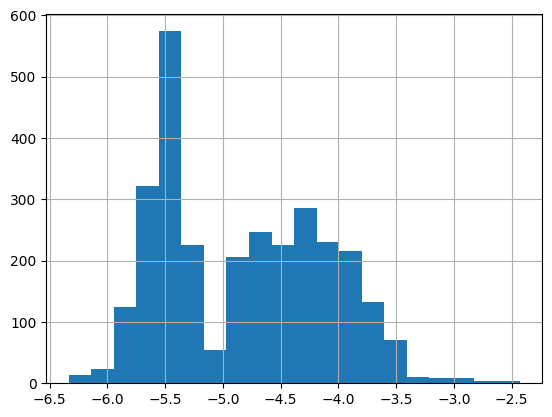

In [70]:
y.hist(bins=20)

In [ ]:
# Splitting the data 80:20 for train:test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [72]:
# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer(output_distribution='normal')
# y_train_trans = qt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [ ]:
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')  # works with negatives too
# y_train_trans = pt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

<Axes: ylabel='Count'>

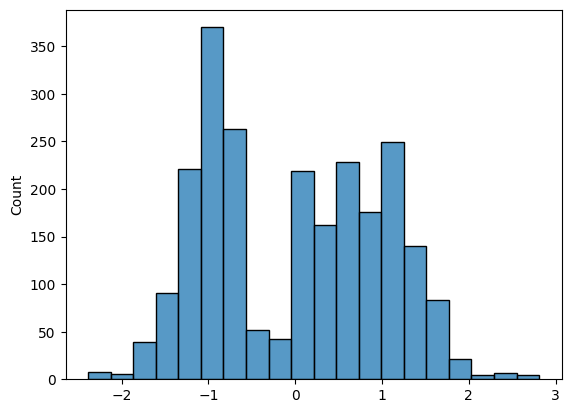

In [ ]:
# import seaborn as sns
# sns.histplot(y_train_trans, bins = 20)

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Standardizing train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# 4. Model Training
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train_scaled, y_train_log)

In [77]:
pd.DataFrame(X_train_scaled, columns=X_test.columns).describe()

,MolMR,HallKierAlpha,lumo_eV,SlogP_VSA6,SMR_VSA9,BCUT2D_MRHI,SMR_VSA7,Chi4n,qed,PEOE_VSA5,...,PEOE_VSA1,PEOE_VSA10,Chi0v,min_abs_partial_charge,fr_Ndealkylation2,fr_piperzine,fr_methoxy,fr_SH,PEOE_VSA12,NumValenceElectrons
count,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,...,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03
mean,-8.930156e-18,1.488359e-16,-3.869734e-17,5.804601e-17,-1.637195e-17,8.241790e-16,5.804601e-17,2.113470e-16,-2.798116e-16,-1.637195e-17,...,9.078992e-17,-1.079061e-17,7.650167e-16,-1.748822e-17,-1.786031e-17,1.488359e-18,3.720898e-17,-2.381375e-17,5.953437e-18,4.822284e-16
std,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,...,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00
min,-2.991715e+00,-5.810055e+00,-8.118853e+00,-3.695586e-01,-1.766196e-01,-1.716123e+00,-3.695586e-01,-2.300610e+00,-3.899140e+00,-3.169124e-01,...,-2.540289e+00,-3.651281e-01,-3.046766e+00,-1.216499e+00,-4.944952e-01,-3.547378e-02,-6.387112e-01,-5.019910e-02,-1.910763e-01,-3.432615e+00
25%,-6.979276e-01,-4.922464e-01,-4.561283e-01,-3.695586e-01,-1.766196e-01,-4.285283e-01,-3.695586e-01,-7.272615e-01,-5.649206e-01,-3.169124e-01,...,-1.013575e+00,-3.651281e-01,-6.438088e-01,-8.200550e-01,-4.944952e-01,-3.547378e-02,-6.387112e-01,-5.019910e-02,-1.910763e-01,-5.966236e-01
50%,1.874810e-01,4.028302e-01,1.353242e-01,-3.695586e-01,-1.766196e-01,-1.897029e-01,-3.695586e-01,-5.377487e-02,1.280309e-01,-3.169124e-01,...,4.026191e-01,-3.651281e-01,1.740757e-01,-2.648863e-01,-4.944952e-01,-3.547378e-02,-6.387112e-01,-5.019910e-02,-1.910763e-01,1.911519e-01
75%,7.190224e-01,6.134365e-01,6.403112e-01,-3.695586e-01,-1.766196e-01,3.945175e-02,-3.695586e-01,6.857982e-01,6.967748e-01,-3.169124e-01,...,4.654815e-01,-3.651281e-01,7.357834e-01,5.947090e-01,-4.944952e-01,-3.547378e-02,1.068572e+00,-5.019910e-02,-1.910763e-01,8.213723e-01
max,2.027116e+00,3.667227e+00,2.447366e+00,5.324518e+00,8.435341e+00,9.338811e+00,5.324518e+00,3.427024e+00,2.167020e+00,5.402120e+00,...,4.714064e+00,7.370839e+00,2.149884e+00,2.956563e+00,2.022264e+00,2.818983e+01,6.190420e+00,1.992068e+01,1.012892e+01,1.451593e+00


In [78]:
X_train_scaled.shape
X_train_scaled[:4]

array([[ 4.61110638e-01,  2.44875523e-01, -8.84686602e-02,
        -3.69558580e-01, -1.76619587e-01, -7.53614713e-01,
        -3.69558580e-01, -7.92234761e-01, -2.54613112e-01,
        -3.16912375e-01, -1.64646390e-01, -2.91347472e-01,
        -1.35693112e-02, -2.54315931e-01, -1.67309406e-01,
        -5.20873647e-01, -8.18769054e-01, -7.96449744e-01,
        -2.81742470e-01, -2.04211897e-01, -2.82025009e-01,
         4.46999896e-01, -2.67617664e-01, -9.16160249e-01,
        -5.90074519e-01,  3.05316353e-01,  8.36838911e-01,
        -1.01586813e+00, -2.88264597e-01, -7.50164185e-02,
        -1.01919177e+00, -8.71673257e-02, -3.20969850e-01,
        -1.94591229e-01, -1.76422659e-01, -1.01919177e+00,
        -2.14949511e-01, -9.18427350e-02, -8.71673257e-02,
        -1.98732867e-01, -9.24784784e-01,  3.42933099e-01,
        -2.08080409e-01, -8.22553848e-01, -1.38310700e+00,
         4.43867390e-01, -8.71673257e-02, -3.54737827e-02,
         5.38685935e-01, -6.76119247e-01, -5.53335402e-0

In [79]:
X_train.shape
X_train.values

array([[ 4.91187000e+01, -1.50000000e-01, -1.63641634e+00, ...,
         0.00000000e+00,  0.00000000e+00,  7.40000000e+01],
       [ 4.24237000e+01, -2.90000000e-01, -4.16138454e+00, ...,
         0.00000000e+00,  0.00000000e+00,  7.80000000e+01],
       [ 5.11118000e+01, -3.40000000e-01, -3.86520059e+00, ...,
         0.00000000e+00,  0.00000000e+00,  7.00000000e+01],
       ...,
       [ 5.13090000e+01, -8.00000000e-02, -5.33131116e-01, ...,
         0.00000000e+00,  0.00000000e+00,  7.20000000e+01],
       [ 4.86705000e+01, -8.00000000e-02,  2.21397505e+00, ...,
         0.00000000e+00,  0.00000000e+00,  6.80000000e+01],
       [ 6.26007000e+01, -3.40000000e-01,  2.19176125e+00, ...,
         0.00000000e+00,  0.00000000e+00,  8.40000000e+01]],
      shape=(2387, 79))

In [80]:
len(X_train)
len(X_test)

597

In [81]:
df_train = pd.DataFrame(X_train_scaled, columns=[f'feat_{i}' for i in range(X_train_scaled.shape[1])])
df_train['target'] = y_train.values

In [82]:
# import smogn

# # Apply SMOGN
# df_smogn = smogn.smoter(
#     data=df_train,
#     y='target',
#     k=5,                   # k-nearest neighbors
#     samp_method='extreme', # best for oversampling tails (not 'balance')
#     rel_thres=0.8,         # anything above 0.8 will be considered "rare"
#     rel_method='auto',     # auto = SMOGN infers from distribution shape
#     under_samp=True,       # optional: downsample high-density areas
#     rel_coef=0.9           # more aggressive weighting of rare samples (optional)
# )

In [83]:
# X_bal = df_smogn.drop(columns='target').values
# y_bal = df_smogn['target'].values

In [84]:
# !pip install optuna
# !pip install catboost

In [ ]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error


# Hyper parameter tuning with optuna
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'depth': trial.suggest_int('depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0, log=True),
        'random_seed': 42,
        'task_type': 'GPU',
        'verbose': 0
    }
    
    # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # mse_scores = []

    # for train_idx, val_idx in kf.split(X_bal):
    #     X_tr, X_val = X_bal[train_idx], X_bal[val_idx]
    #     y_tr, y_val = y_bal[train_idx], y_bal[val_idx]

    #     model = CatBoostRegressor(**params)
    #     model.fit(X_tr, y_tr, eval_set=(X_val, y_val), early_stopping_rounds=50)

    #     preds = model.predict(X_val)
    #     mse = mean_squared_error(y_val, preds)
    #     mse_scores.append(mse)

    # return np.mean(mse_scores)

    # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # mse_scores = []

    # for train_idx, val_idx in kf.split(X_train_scaled):
    #     X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    #     y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    #     try:
    #         y_bins = pd.qcut(y_tr, q=5, labels=False, duplicates='drop')
    #     except ValueError:
    #         y_bins = pd.cut(y_tr, bins=5, labels=False)

    #     sample_weights = compute_sample_weight(class_weight='balanced', y=y_bins)

    #     model = CatBoostRegressor(**params)
    #     model.fit(X_tr, y_tr, sample_weight=sample_weights, eval_set=(X_val, y_val), early_stopping_rounds=50)

    #     preds = model.predict(X_val)
    #     mse = mean_squared_error(y_val, preds)
    #     mse_scores.append(mse)

    # return np.mean(mse_scores)

    model = CatBoostRegressor(**params)
    
    # Cross Validation
    score = cross_val_score(model, X_train_scaled, y_train, 
                            scoring='neg_mean_squared_error', 
                            cv=5, error_score='raise')
    
    return -1 * np.mean(score)

In [ ]:
# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # e.g. run for 30 minutes

# Compute weights from full training set
# y_bins_full = pd.qcut(y_train, q=5, labels=False, duplicates='drop')
# sample_weights_full = compute_sample_weight(class_weight='balanced', y=y_bins_full)
best_params = study.best_params
# Train final model using the best parameters + weights
best_model = CatBoostRegressor(**best_params, task_type='GPU', random_seed=42, verbose=100)
# best_model.fit(X_train_scaled, y_train, sample_weight=sample_weights_full)
# best_model.fit(X_train_scaled, y_train)
# best_model.fit(X_bal, y_bal)
best_model.fit(X_train_scaled, y_train) #Fitting the model

# # Best model
# best_params = study.best_params
# best_model = CatBoostRegressor(**best_params, task_type='GPU', random_seed=42, verbose=0)
# best_model.fit(X_train_scaled, y_train)

[I 2025-07-24 01:46:59,301] A new study created in memory with name: no-name-46596f0b-945b-4b3b-bb8d-44443f45a086
[I 2025-07-24 01:47:19,023] Trial 0 finished with value: 0.2070961640323028 and parameters: {'iterations': 640, 'depth': 4, 'learning_rate': 0.02520854054002943, 'l2_leaf_reg': 5.274756387799185}. Best is trial 0 with value: 0.2070961640323028.
[I 2025-07-24 01:47:23,964] Trial 1 finished with value: 0.2058396517591647 and parameters: {'iterations': 459, 'depth': 4, 'learning_rate': 0.015528226442796642, 'l2_leaf_reg': 1.589284843841233}. Best is trial 1 with value: 0.2058396517591647.
[I 2025-07-24 01:47:28,740] Trial 2 finished with value: 0.20060404128995576 and parameters: {'iterations': 254, 'depth': 7, 'learning_rate': 0.03416292917371195, 'l2_leaf_reg': 0.2679959490497081}. Best is trial 2 with value: 0.20060404128995576.
[I 2025-07-24 01:47:51,870] Trial 3 finished with value: 0.21200318395082224 and parameters: {'iterations': 534, 'depth': 6, 'learning_rate': 0.202

0:	learn: 0.6754414	total: 3.83ms	remaining: 1.04s
100:	learn: 0.3649571	total: 340ms	remaining: 576ms
200:	learn: 0.2916736	total: 668ms	remaining: 236ms
271:	learn: 0.2543140	total: 909ms	remaining: 0us


In [ ]:
best_model.save_model("catboost_model_ea_dft.cbm") #Saving the best model to disk

In [87]:
# Load from file
# best_model = CatBoostRegressor()
# best_model.load_model("catboost_model_ea.cbm")

In [88]:
import catboost
catboost.__version__

'1.2.8'

In [89]:

# 5. Evaluation
# y_pred_log = model.predict(X_test_scaled)
# ------------------- Step 5: Predict and Inverse Transform ------------------- #
# y_pred_orig = model.predict(X_test_scaled)
y_pred_orig = best_model.predict(X_test_scaled)
y_pred_train = best_model.predict(X_train_scaled)
# y_bal_train = best_model.predict(X_bal)
# y_pred_orig = pt.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()
# y_pred_train = pt.inverse_transform(y_pred_train_trans.reshape(-1, 1)).flatten()
# y_pred_orig = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# Inverse log1p
# y_pred = np.expm1(y_pred_log)
# y_test = np.expm1(y_test)


In [ ]:

# Calculating errors
from sklearn.metrics import mean_squared_error, r2_score

# rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
r2 = r2_score(y_test, y_pred_orig)
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.4253
R² Score: 0.6573


In [91]:
feature_names = X.columns.tolist()  # This should match the model's input

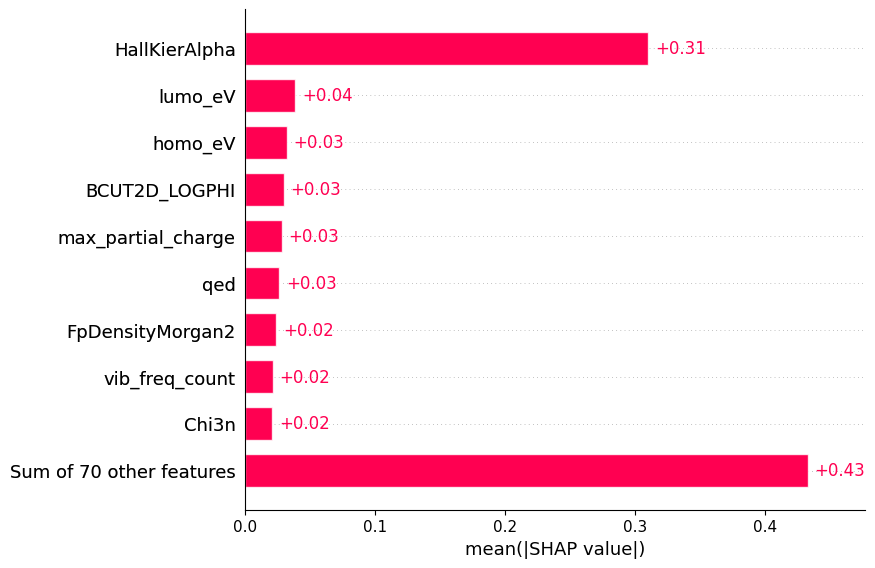

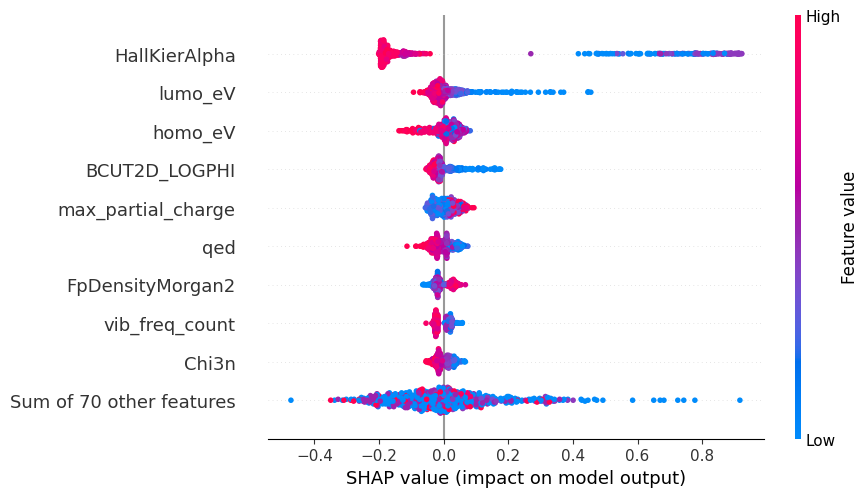

In [ ]:
# Shap Diagrams
import shap

explainer = shap.Explainer(best_model, X_test_scaled, feature_names=X.columns)
shap_values = explainer(X_test_scaled)

shap.plots.bar(shap_values, max_display=10)
shap.plots.beeswarm(shap_values, max_display=10)

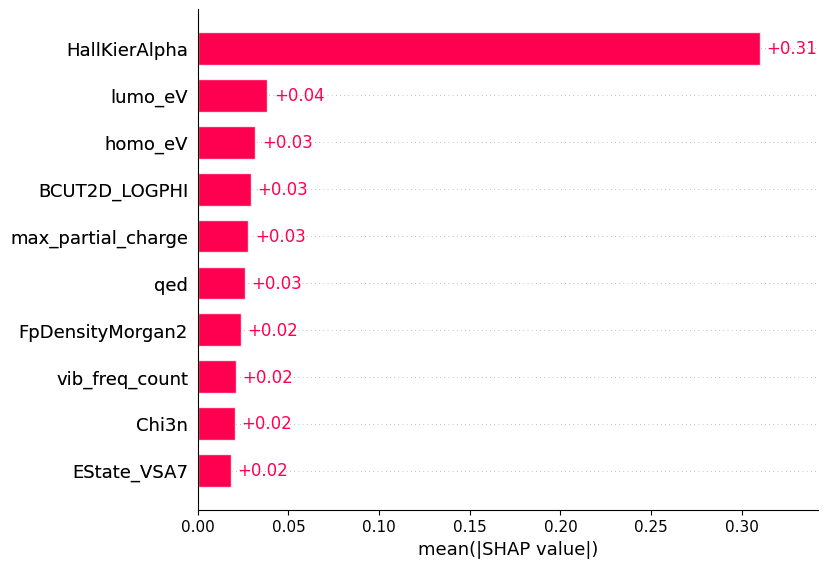

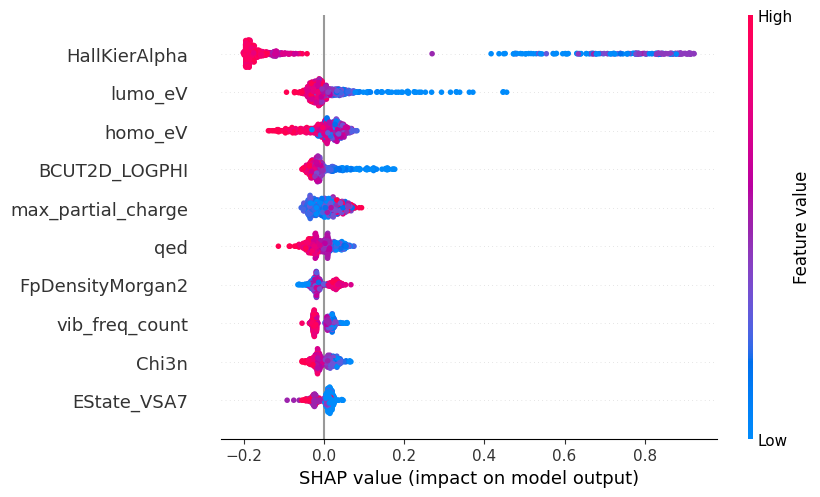

In [93]:
# Compute SHAP values
# explainer = shap.Explainer(model, X_test_scaled, feature_names=X.columns)
# shap_values = explainer(X_test_scaled)

# Get mean absolute SHAP values per feature and sort them
mean_shap = np.abs(shap_values.values).mean(axis=0)
top_10_indices = np.argsort(mean_shap)[-10:][::-1]

# Slice SHAP explanation to include only top 10 features
shap_values_top10 = shap.Explanation(
    values=shap_values.values[:, top_10_indices],
    base_values=shap_values.base_values,
    data=shap_values.data[:, top_10_indices],
    feature_names=np.array(shap_values.feature_names)[top_10_indices].tolist()
)

# Plot only top 10 features
shap.plots.bar(shap_values_top10)
shap.plots.beeswarm(shap_values_top10)

In [95]:
# df["FractionCSP3"].value_counts()

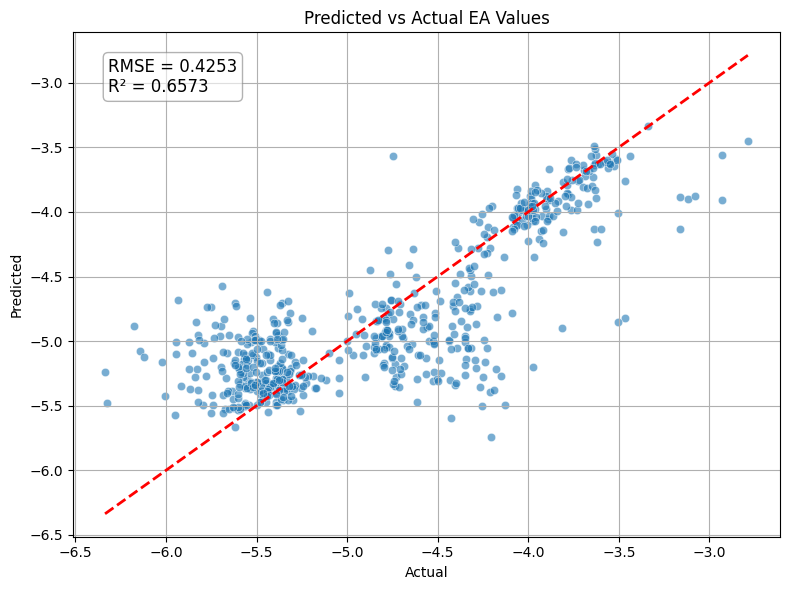

In [96]:
residuals = y_test - y_pred_orig

import matplotlib.pyplot as plt
import seaborn as sns 

# --- A. Predicted vs Actual Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_orig, alpha=0.6)

# Reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2)

# Annotate RMSE and R² inside the plot
plt.text(
    0.05, 0.95,
    f"RMSE = {rmse:.4f}\nR² = {r2:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.6)
)

plt.title("Predicted vs Actual EA Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

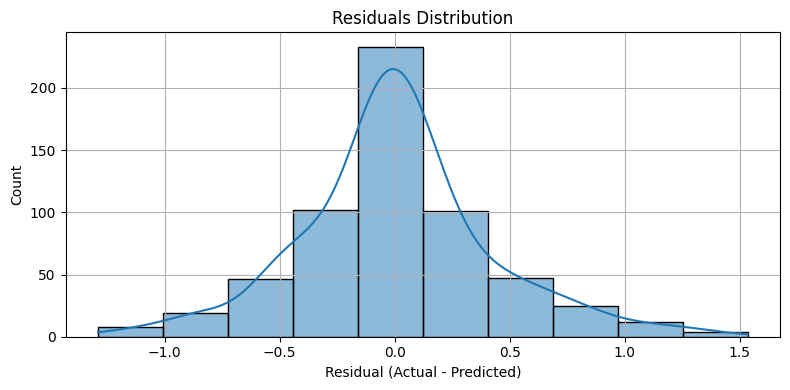

In [97]:
# --- B. Histogram of Residuals ---
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=10)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# Save the model to a JSON file
best_model.save_model("cgb_ea_model.json")

C:\Users\nandi\AppData\Local\Temp\ipykernel_15292\3234612493.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


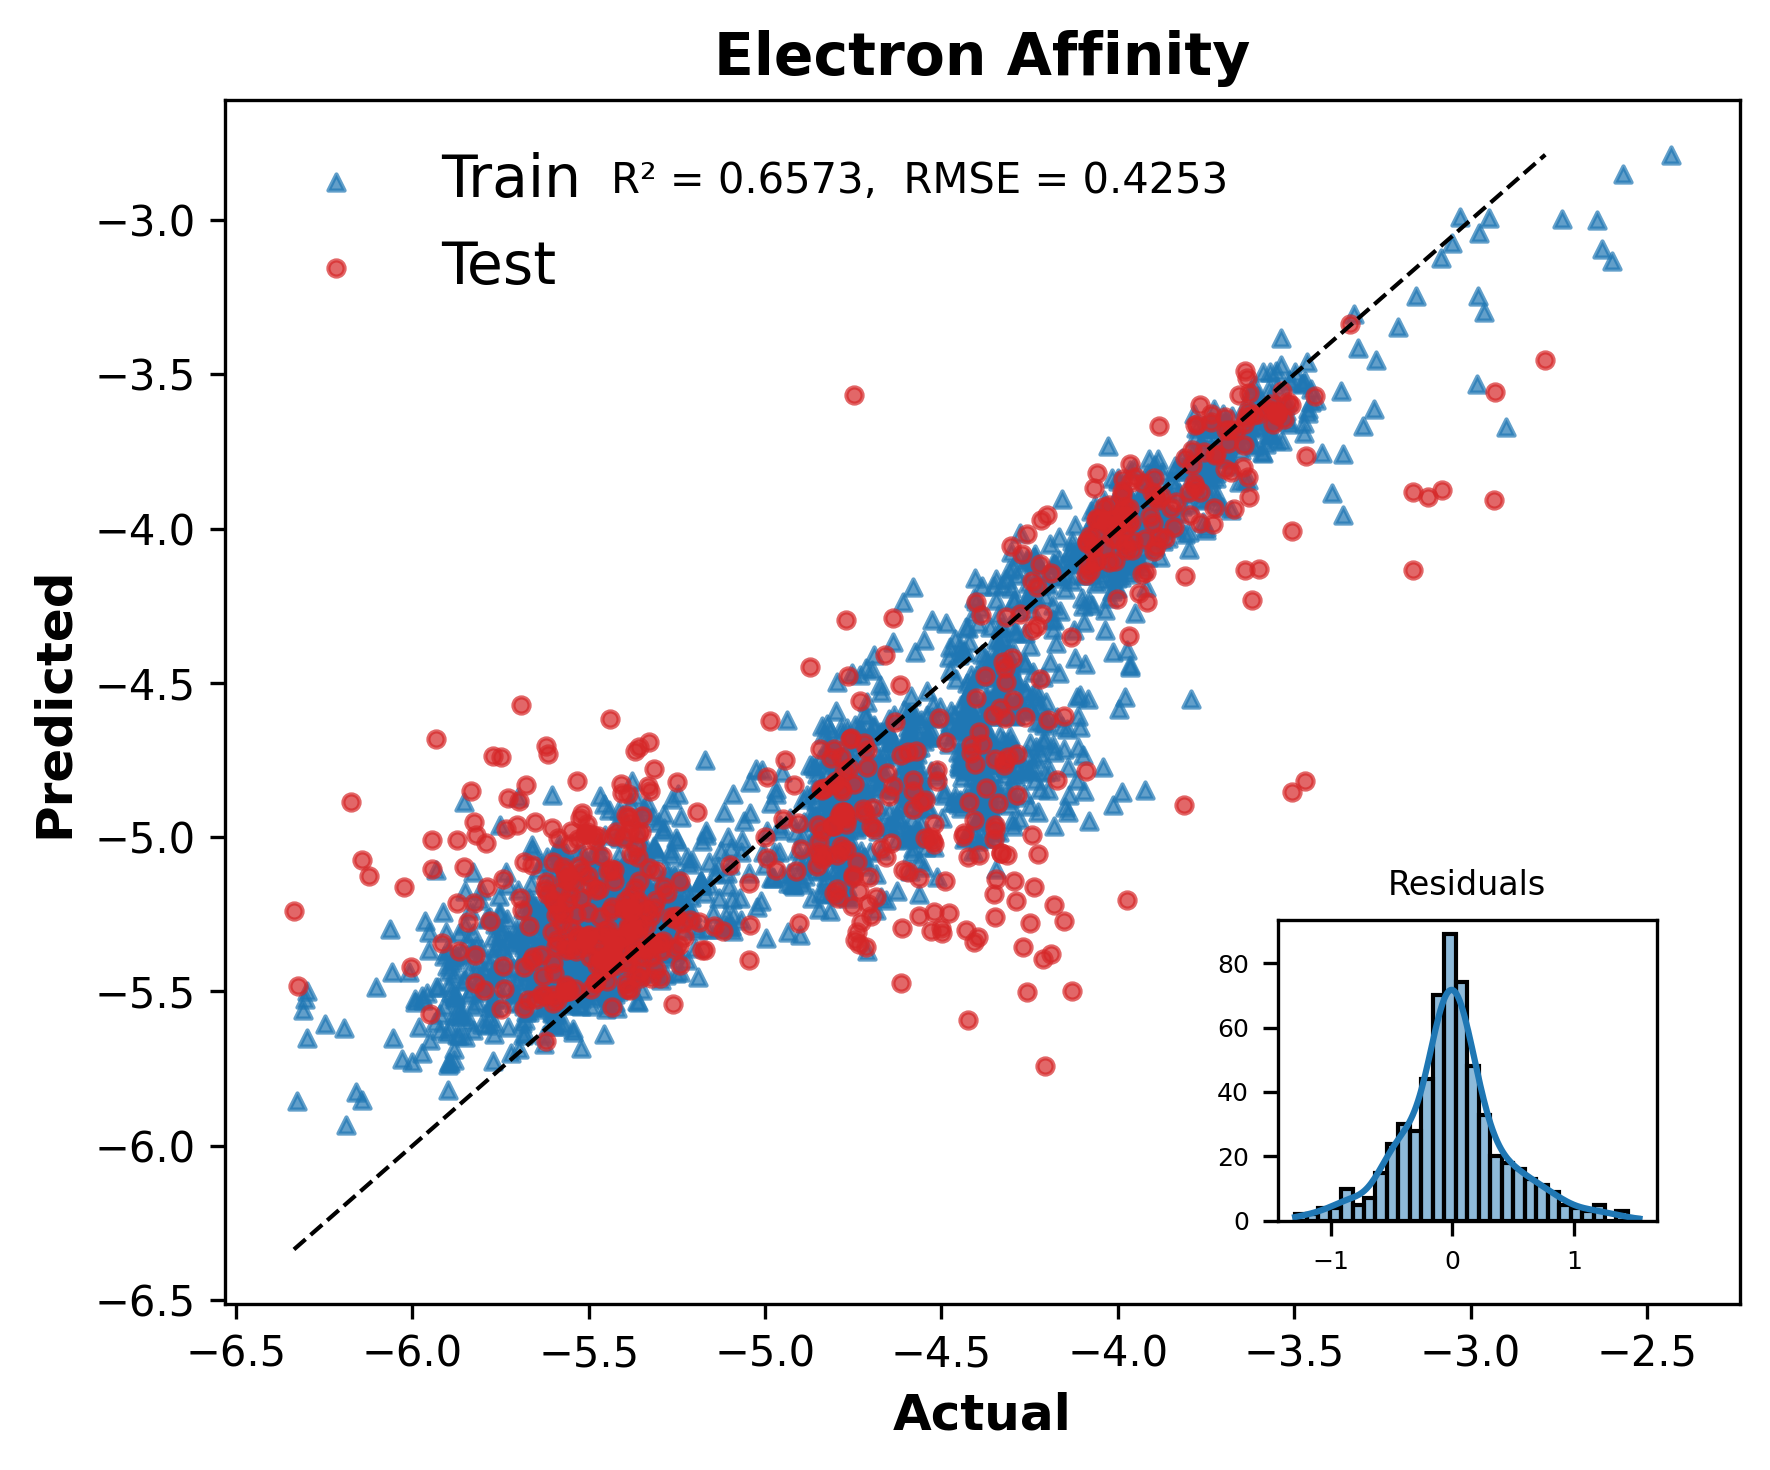

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ➤ Create main plot with better layout engine
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

# ➤ Scatter: Train and Test
ax.scatter(y_train, y_pred_train, alpha=0.7, s=15, color='tab:blue', marker='^', label='Train')
# ax.scatter(y_bal, y_bal_train, alpha=0.7, s=15, color='tab:blue', marker='^', label='Train')
ax.scatter(y_test, y_pred_orig, alpha=0.7, s=15, color='tab:red', marker='o', label='Test')

# ➤ Diagonal reference line
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)

# ➤ Title and axes labels
ax.set_title("Electron Affinity", fontsize=14, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize=12, fontweight='bold')
ax.tick_params(axis='both', labelsize=10)

# ➤ Custom legend with performance metrics
# ax.legend(title=f"RMSE = {rmse:.4f}\nR² = {r2:.4f}", loc='upper left', fontsize=10, title_fontsize=10, frameon=False)

x_center = (y_test.min() + y_test.max()) / 2
# y_top = y_pred_orig.max() + (y_pred_orig.max() - y_pred_orig.min()) * 0.15
y_top = ax.get_ylim()[1] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0])
ax.text(x_center, y_top, f"R² = {r2:.4f},  RMSE = {rmse:.4f}",
        fontsize=10, ha='center', va='top')

# ➤ Legend
ax.legend(loc='upper left', fontsize=14, frameon=False)
# ➤ Inset residual plot
inset_ax = inset_axes(ax, width="25%", height="25%", loc='lower right', borderpad=2)
sns.histplot(residuals, bins=30, kde=True, ax=inset_ax)
inset_ax.set_title("Residuals", fontsize=8)
inset_ax.set_xlabel("")
inset_ax.set_ylabel("")
inset_ax.tick_params(labelsize=6)

# ➤ Save and display
plt.tight_layout()
plt.savefig("predicted_vs_actual_with_train_test.png", dpi=300, bbox_inches='tight')
plt.show()
